In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser

from ydata_profiling import ProfileReport

### Read in data and view information

In [2]:
df = pd.read_csv("churn_data.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Complain  Satisfaction Score Card Type  Point Earned  \
0        101348.88         1                   2   DIAMOND           464   
1        112542.58         1                   3   DIAMOND           456   
2        113931.57         1                   3   DIAMOND           377   
3         93826.63         0                   5      GOLD           350   
4         79084.10         0                   5      GOLD           425   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [3]:
df.shape

(10000, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

In [5]:
df.describe(include = "all")

RowNumber    CustomerId Surname   CreditScore Geography Gender  \
count   10000.00000  1.000000e+04   10000  10000.000000     10000  10000   
unique          NaN           NaN    2932           NaN         3      2   
top             NaN           NaN   Smith           NaN    France   Male   
freq            NaN           NaN      32           NaN      5014   5457   
mean     5000.50000  1.569094e+07     NaN    650.528800       NaN    NaN   
std      2886.89568  7.193619e+04     NaN     96.653299       NaN    NaN   
min         1.00000  1.556570e+07     NaN    350.000000       NaN    NaN   
25%      2500.75000  1.562853e+07     NaN    584.000000       NaN    NaN   
50%      5000.50000  1.569074e+07     NaN    652.000000       NaN    NaN   
75%      7500.25000  1.575323e+07     NaN    718.000000       NaN    NaN   
max     10000.00000  1.581569e+07     NaN    850.000000       NaN    NaN   

                 Age        Tenure        Balance  NumOfProducts    HasCrCard  \
count   10000.000000  10000.000000   10000.000000   10000.000000  10000.00000   
unique           NaN           NaN            NaN            NaN          NaN   
top              NaN           NaN            NaN            NaN          NaN   
freq             NaN           NaN            NaN            NaN          NaN   
mean       38.921800      5.012800   76485.889288       1.530200      0.70550   
std        10.487806      2.892174   62397.405202       0.581654      0.45584   
min        18.000000      0.000000       0.000000       1.000000      0.00000   
25%        32.000000      3.000000       0.000000       1.000000      0.00000   
50%        37.000000      5.000000   97198.540000       1.000000      1.00000   
75%        44.000000      7.000000  127644.240000       2.000000      1.00000   
max        92.000000     10.000000  250898.090000       4.000000      1.00000   

        IsActiveMember  EstimatedSalary      Complain  Satisfaction Score  \
count     10000.000000     10000.000000  10000.000000        10000.000000   
unique             NaN              NaN           NaN                 NaN   
top                NaN              NaN           NaN                 NaN   
freq               NaN              NaN           NaN                 NaN   
mean          0.515100    100090.239881      0.204400            3.013800   
std           0.499797     57510.492818      0.403283            1.405919   
min           0.000000        11.580000      0.000000            1.000000   
25%           0.000000     51002.110000      0.000000            2.000000   
50%           1.000000    100193.915000      0.000000            3.000000   
75%           1.000000    149388.247500      0.000000            4.000000   
max           1.000000    199992.480000      1.000000            5.000000   

       Card Type  Point Earned        Exited  
count      10000  10000.000000  10000.000000  
unique         4           NaN           NaN  
top      DIAMOND           NaN           NaN  
freq        2507           NaN           NaN  
mean         NaN    606.515100      0.203800  
std          NaN    225.924839      0.402842  
min          NaN    119.000000      0.000000  
25%          NaN    410.000000      0.000000  
50%          NaN    605.000000      0.000000  
75%          NaN    801.000000      0.000000  
max          NaN   1000.000000      1.000000

### Dataset Description

The dataset consists of **10,000 entries** with **18 columns** representing various features about bank customers. These features are a mix of numeric, categorical, and binary data types that could influence customer churn.

##### Initial Features
- `RowNumber` (*int64*): The index of each row, serving only as an identifier and not influencing the target variable.
- `CustomerId` (*int64*): A unique identifier for each customer, which does not affect the prediction of churn.
- `Surname` (*object*): The surname of the customer. This is a non-influential categorical feature.
- `CreditScore` (*int64*): A numerical value representing the customer’s credit score, which may influence their likelihood to leave the bank.
- `Geography` (*object*): Categorical data representing the customer's location, potentially impacting customer churn.
- `Gender` (*object*): The gender of the customer, possibly affecting their likelihood to exit the bank.
- `Age` (*int64*): A key feature, as age can have a significant influence on a customer’s loyalty to the bank.
- `Tenure` (*int64*): The number of years the customer has been with the bank. Typically, a longer tenure suggests higher loyalty.
- `Balance` (*float64*): The account balance of the customer, a possibly strong predictor as customers with higher balances may be less likely to leave.
- `NumOfProducts` (*int64*): The number of products held by the customer at the bank. Higher product ownership could correlates with higher customer retention.
- `HasCrCard` (*int64*): A binary feature indicating whether the customer has a credit card, which may influence their likelihood of staying with the bank.
- `IsActiveMember` (*int64*): A binary indicator of whether the customer is an active member, which could correlate with lower churn.
- `EstimatedSalary` (*float64*): The customer’s estimated salary. Customers with lower salaries may be more prone to leaving.
- `Complain` (*int64*): A binary feature indicating if the customer has filed complaints, which can affect their satisfaction and loyalty.
- `Satisfaction Score` (*int64*): The score given by customers for complaint resolution, potentially influencing their decision to stay or leave.
- `Card Type` (*object*): The type of credit card the customer holds, which may indirectly influence their loyalty.
- `Points Earned` (*int64*): The number of reward points the customer has earned through card usage, possibly affecting their decision to stay.

##### Target
- `Exited` (*int64*): A binary target variable indicating whether the customer left the bank (`1`) or stayed (`0`).


### Generate preliminary data profile report

In [6]:
profile = ProfileReport(df, title = "Summary Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Save the report as an HTML file
profile.to_file("summary_report.html")

# Open the HTML report in the default web browser
webbrowser.open("summary_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

### Make changes to dataframe according to initial data profile

In [8]:
# Remove features that our group thinks are non-relevant in determining churn + 1 feature column perfectly correlated with target
df = df.drop(["RowNumber", "CustomerId", "Surname", "Complain"], axis = 1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Satisfaction Score', 'Card Type', 'Point Earned', 'Exited'],
      dtype='object')

In [9]:
# Add relevant columns
df["age_group"] = pd.cut(df["Age"], bins = [17, 25, 45, 64, 150], labels = ["Young Adults (18-25)", "Middle-Aged (26-45)", "Older Adults (46-64)", "Retirement Aged (65+)"])

# Rename columns to follow consistent case convention (snake_case)
df = df.rename(
    columns = {
        "CreditScore": "credit_score", 
        "Geography": "geography", 
        "Gender": "gender",
        "Age": "age",
        "Tenure": "tenure",
        "Balance": "balance",
        "NumOfProducts": "num_products",
        "HasCrCard": "has_credit_card",
        "IsActiveMember": "is_active",
        "EstimatedSalary": "est_salary",
        "Satisfaction Score": "satisfaction_score",
        "Card Type": "card_type",
        "Point Earned": "pts_earned",
        "Exited": "churned"
    }
)

# Print dataframe used for EDA
df.head()

credit_score geography  gender  age  tenure    balance  num_products  \
0           619    France  Female   42       2       0.00             1   
1           608     Spain  Female   41       1   83807.86             1   
2           502    France  Female   42       8  159660.80             3   
3           699    France  Female   39       1       0.00             2   
4           850     Spain  Female   43       2  125510.82             1   

   has_credit_card  is_active  est_salary  satisfaction_score card_type  \
0                1          1   101348.88                   2   DIAMOND   
1                0          1   112542.58                   3   DIAMOND   
2                1          0   113931.57                   3   DIAMOND   
3                0          0    93826.63                   5      GOLD   
4                1          1    79084.10                   5      GOLD   

   pts_earned  churned            age_group  
0         464        1  Middle-Aged (26-45)  
1         456        0  Middle-Aged (26-45)  
2         377        1  Middle-Aged (26-45)  
3         350        0  Middle-Aged (26-45)  
4         425        0  Middle-Aged (26-45)

### Start Exploratory Data Analysis (EDA) on modified dataframe

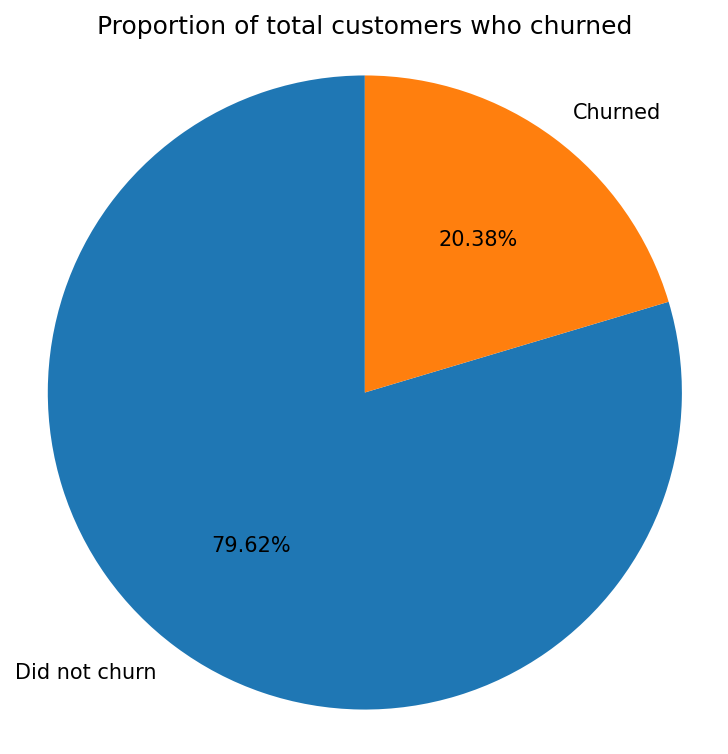

In [10]:
%matplotlib inline

# Churn distribution for total dataset
plt.figure(figsize = (6, 6), dpi = 150)
churn_counts = df["churned"].value_counts()
plt.pie(churn_counts, labels = ["Did not churn", "Churned"], autopct = '%1.2f%%', startangle = 90)
plt.axis("equal")
plt.title("Proportion of total customers who churned")
plt.show()

**Categorical VS Numeric Features**

Divide dataset into categorical and numeric dataframes for more consistent and interprable data visualisations

*Categorical*
- geography
- gender
- has_credit_card
- is_active
- card_type
- age_group

*Numeric*
- credit_score
- age
- tenure
- balance
- num_products
- est_salary
- satisfaction_score (out of 5)
- pts_earned

##### Categorical Analysis

In [11]:
# Create categorical dataframe
cat_df = df[["geography", "gender", "has_credit_card", "is_active", "card_type", "age_group", "churned"]]
cat_df.head()

geography  gender  has_credit_card  is_active card_type  \
0    France  Female                1          1   DIAMOND   
1     Spain  Female                0          1   DIAMOND   
2    France  Female                1          0   DIAMOND   
3    France  Female                0          0      GOLD   
4     Spain  Female                1          1      GOLD   

             age_group  churned  
0  Middle-Aged (26-45)        1  
1  Middle-Aged (26-45)        0  
2  Middle-Aged (26-45)        1  
3  Middle-Aged (26-45)        0  
4  Middle-Aged (26-45)        0

In [12]:
# Create function to generate categorical bar chart comparison between churned and non-churned customers + churn rate of specific groups
def create_countplot(dataframe, cat_feature, target_col):
    # Plot figure
    plt.figure(figsize = (8, 4), dpi = 150)
    sns.set_style('darkgrid')

    ax = sns.countplot(y = cat_feature, hue = target_col, data = dataframe)

    for container in ax.containers:
        ax.bar_label(container, fontsize = 10, label_type = "center")

    ax.legend(title = "Churn Status", labels = ["0 - Did Not Churn", "1 - Churned"], bbox_to_anchor = (1.01, 0.5), loc = "center left")

    plt.title(f"Churn rate by {cat_feature}")
    plt.show()

    # Print out the proportion of churned customer per group
    rates = dataframe.groupby(cat_feature)[target_col].mean()
    print((rates * 100).round(2).astype(str) + "%")

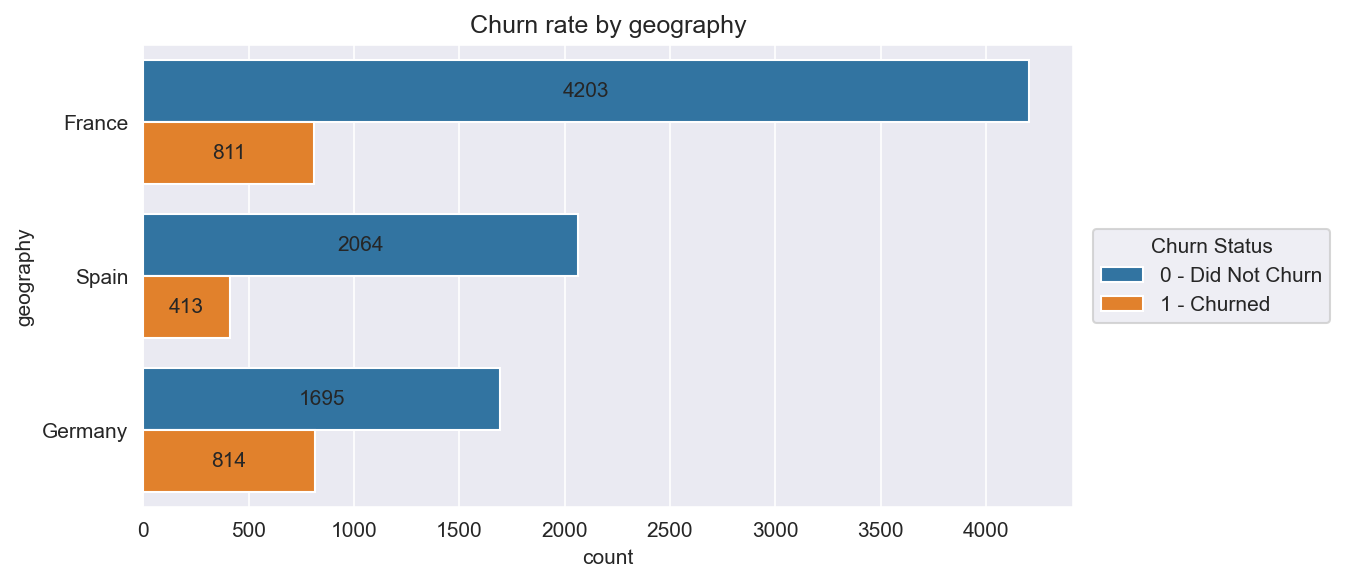

geography
France     16.17%
Germany    32.44%
Spain      16.67%
Name: churned, dtype: object


In [13]:
# Churn by geography
create_countplot(df, "geography", "churned")

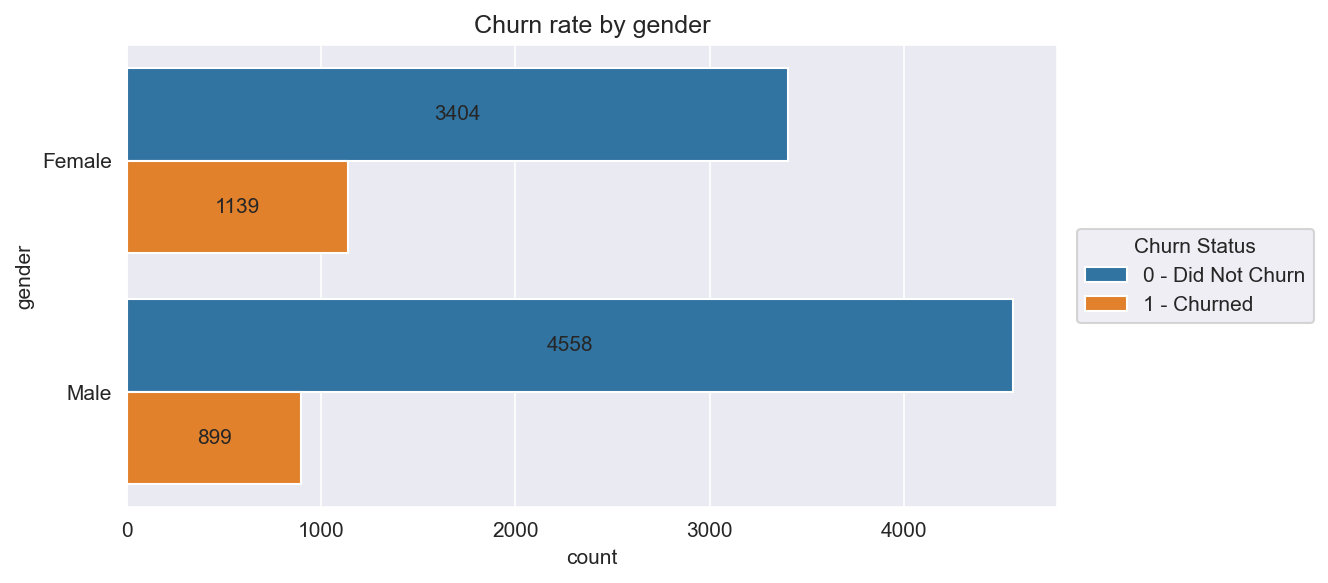

gender
Female    25.07%
Male      16.47%
Name: churned, dtype: object


In [14]:
# Churn by gender
create_countplot(df, "gender", "churned")

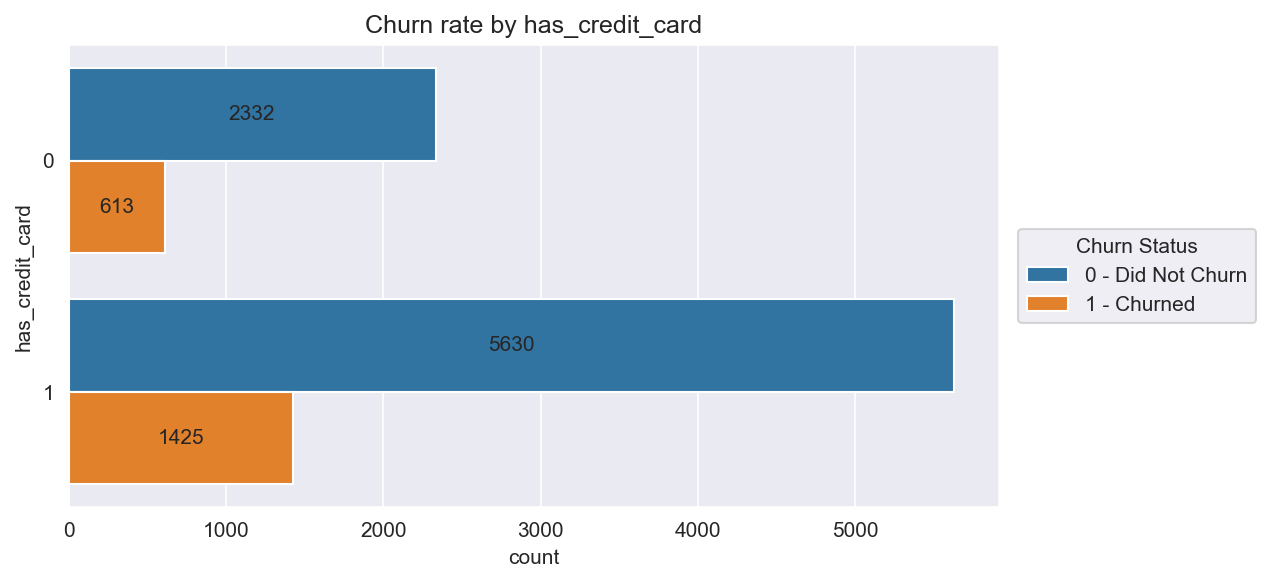

has_credit_card
0    20.81%
1     20.2%
Name: churned, dtype: object


In [15]:
# Churn by credit card
create_countplot(df, "has_credit_card", "churned")

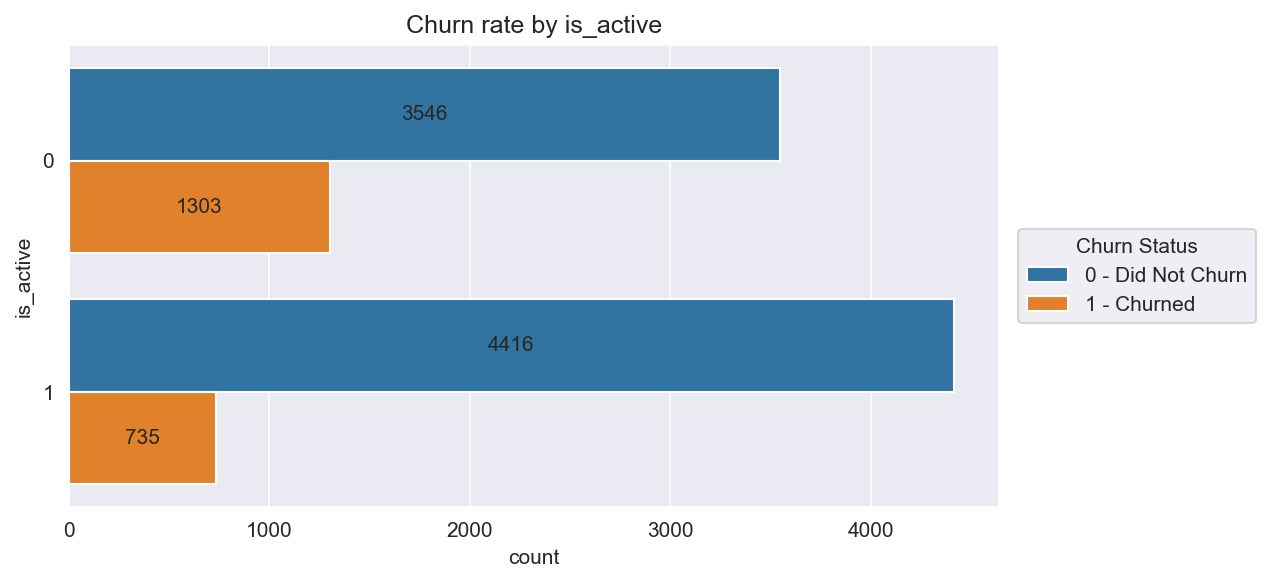

is_active
0    26.87%
1    14.27%
Name: churned, dtype: object


In [16]:
# Churn by activity level
create_countplot(df, "is_active", "churned")

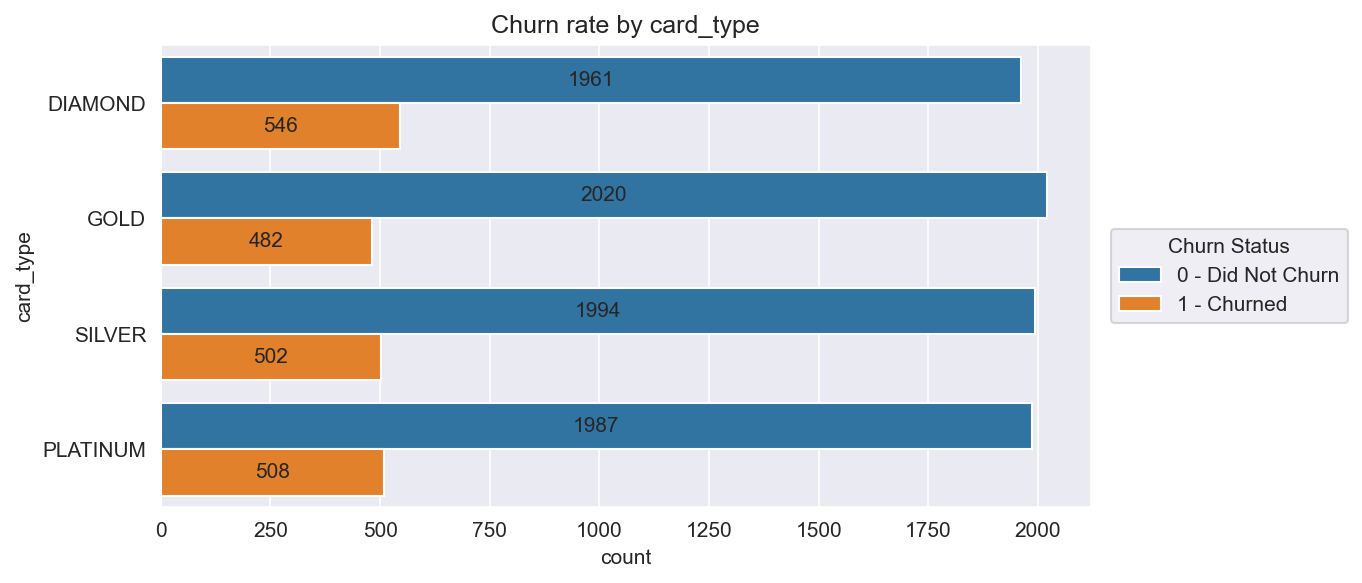

card_type
DIAMOND     21.78%
GOLD        19.26%
PLATINUM    20.36%
SILVER      20.11%
Name: churned, dtype: object


In [17]:
# Churn by card type
create_countplot(df, "card_type", "churned")

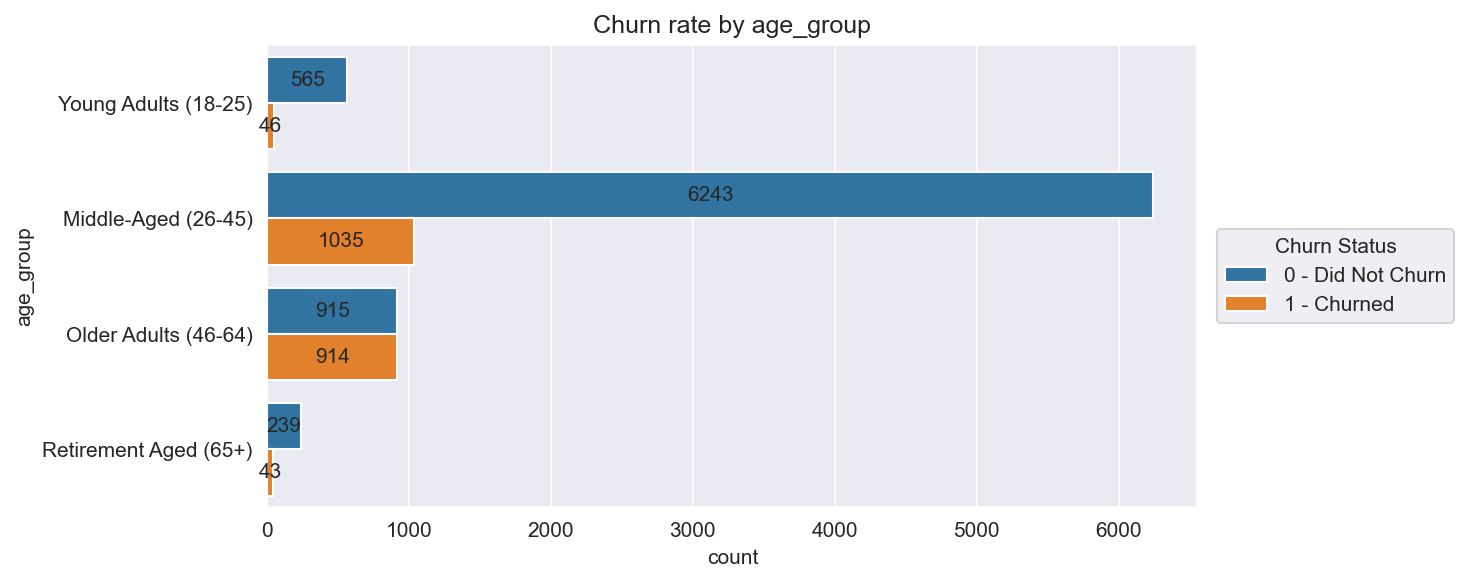

age_group
Young Adults (18-25)      7.53%
Middle-Aged (26-45)      14.22%
Older Adults (46-64)     49.97%
Retirement Aged (65+)    15.25%
Name: churned, dtype: object


In [18]:
# Churn by age group
create_countplot(df, "age_group", "churned")

**Insights from Bar Charts**

1. **Geography**: Customers from **Germany** exhibit the highest churn rate at **32.44%**, indicating potential dissatisfaction or issues specific to this market. In contrast, **France** and **Spain** show significantly lower churn rates at **16.17%** and **16.67%**, respectively.

2. **Gender**: **Female** customers have a higher churn rate (**25.07%**) compared to **Male** customers (**16.47%**). This suggests that female customers may be more likely to leave, possibly due to differences in service expectations or satisfaction.

3. **Credit Card Ownership**: The churn rates for customers with a credit card (**20.2%**) and those without it (**20.81%**) are quite similar, indicating that having a credit card does not significantly influence churn behavior.

4. **Activity Status**: **Inactive** customers (`is_active == 0`) have a substantially higher churn rate (**26.87%**) compared to **active** customers (`is_active == 1`, **14.27%**). This highlights the importance of maintaining customer engagement to reduce churn.

5. **Card Type**: Churn rates vary slightly across different card types, with **DIAMOND** cardholders having the highest churn rate (**21.78%**) and **SILVER** cardholders the lowest (**20.11%**). However, the differences are relatively minor.

6. **Age Group**: The **Older Adults (46-64)** category has the highest churn rate at **49.97%**, indicating that this age group is particularly at risk. Conversely, **Young Adults (18-25)** show the lowest churn rate (**7.47%**), suggesting greater loyalty or satisfaction among younger customers. The split in age group reflects different spending powers, which could also impact churn.

##### Numeric Analysis

In [19]:
# Create numeric dataframe
num_df = df[["credit_score", "age", "tenure", "balance", "num_products", "est_salary", "satisfaction_score", "pts_earned", "churned"]]
num_df.head()

credit_score  age  tenure    balance  num_products  est_salary  \
0           619   42       2       0.00             1   101348.88   
1           608   41       1   83807.86             1   112542.58   
2           502   42       8  159660.80             3   113931.57   
3           699   39       1       0.00             2    93826.63   
4           850   43       2  125510.82             1    79084.10   

   satisfaction_score  pts_earned  churned  
0                   2         464        1  
1                   3         456        0  
2                   3         377        1  
3                   5         350        0  
4                   5         425        0

c:\Users\ngten\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


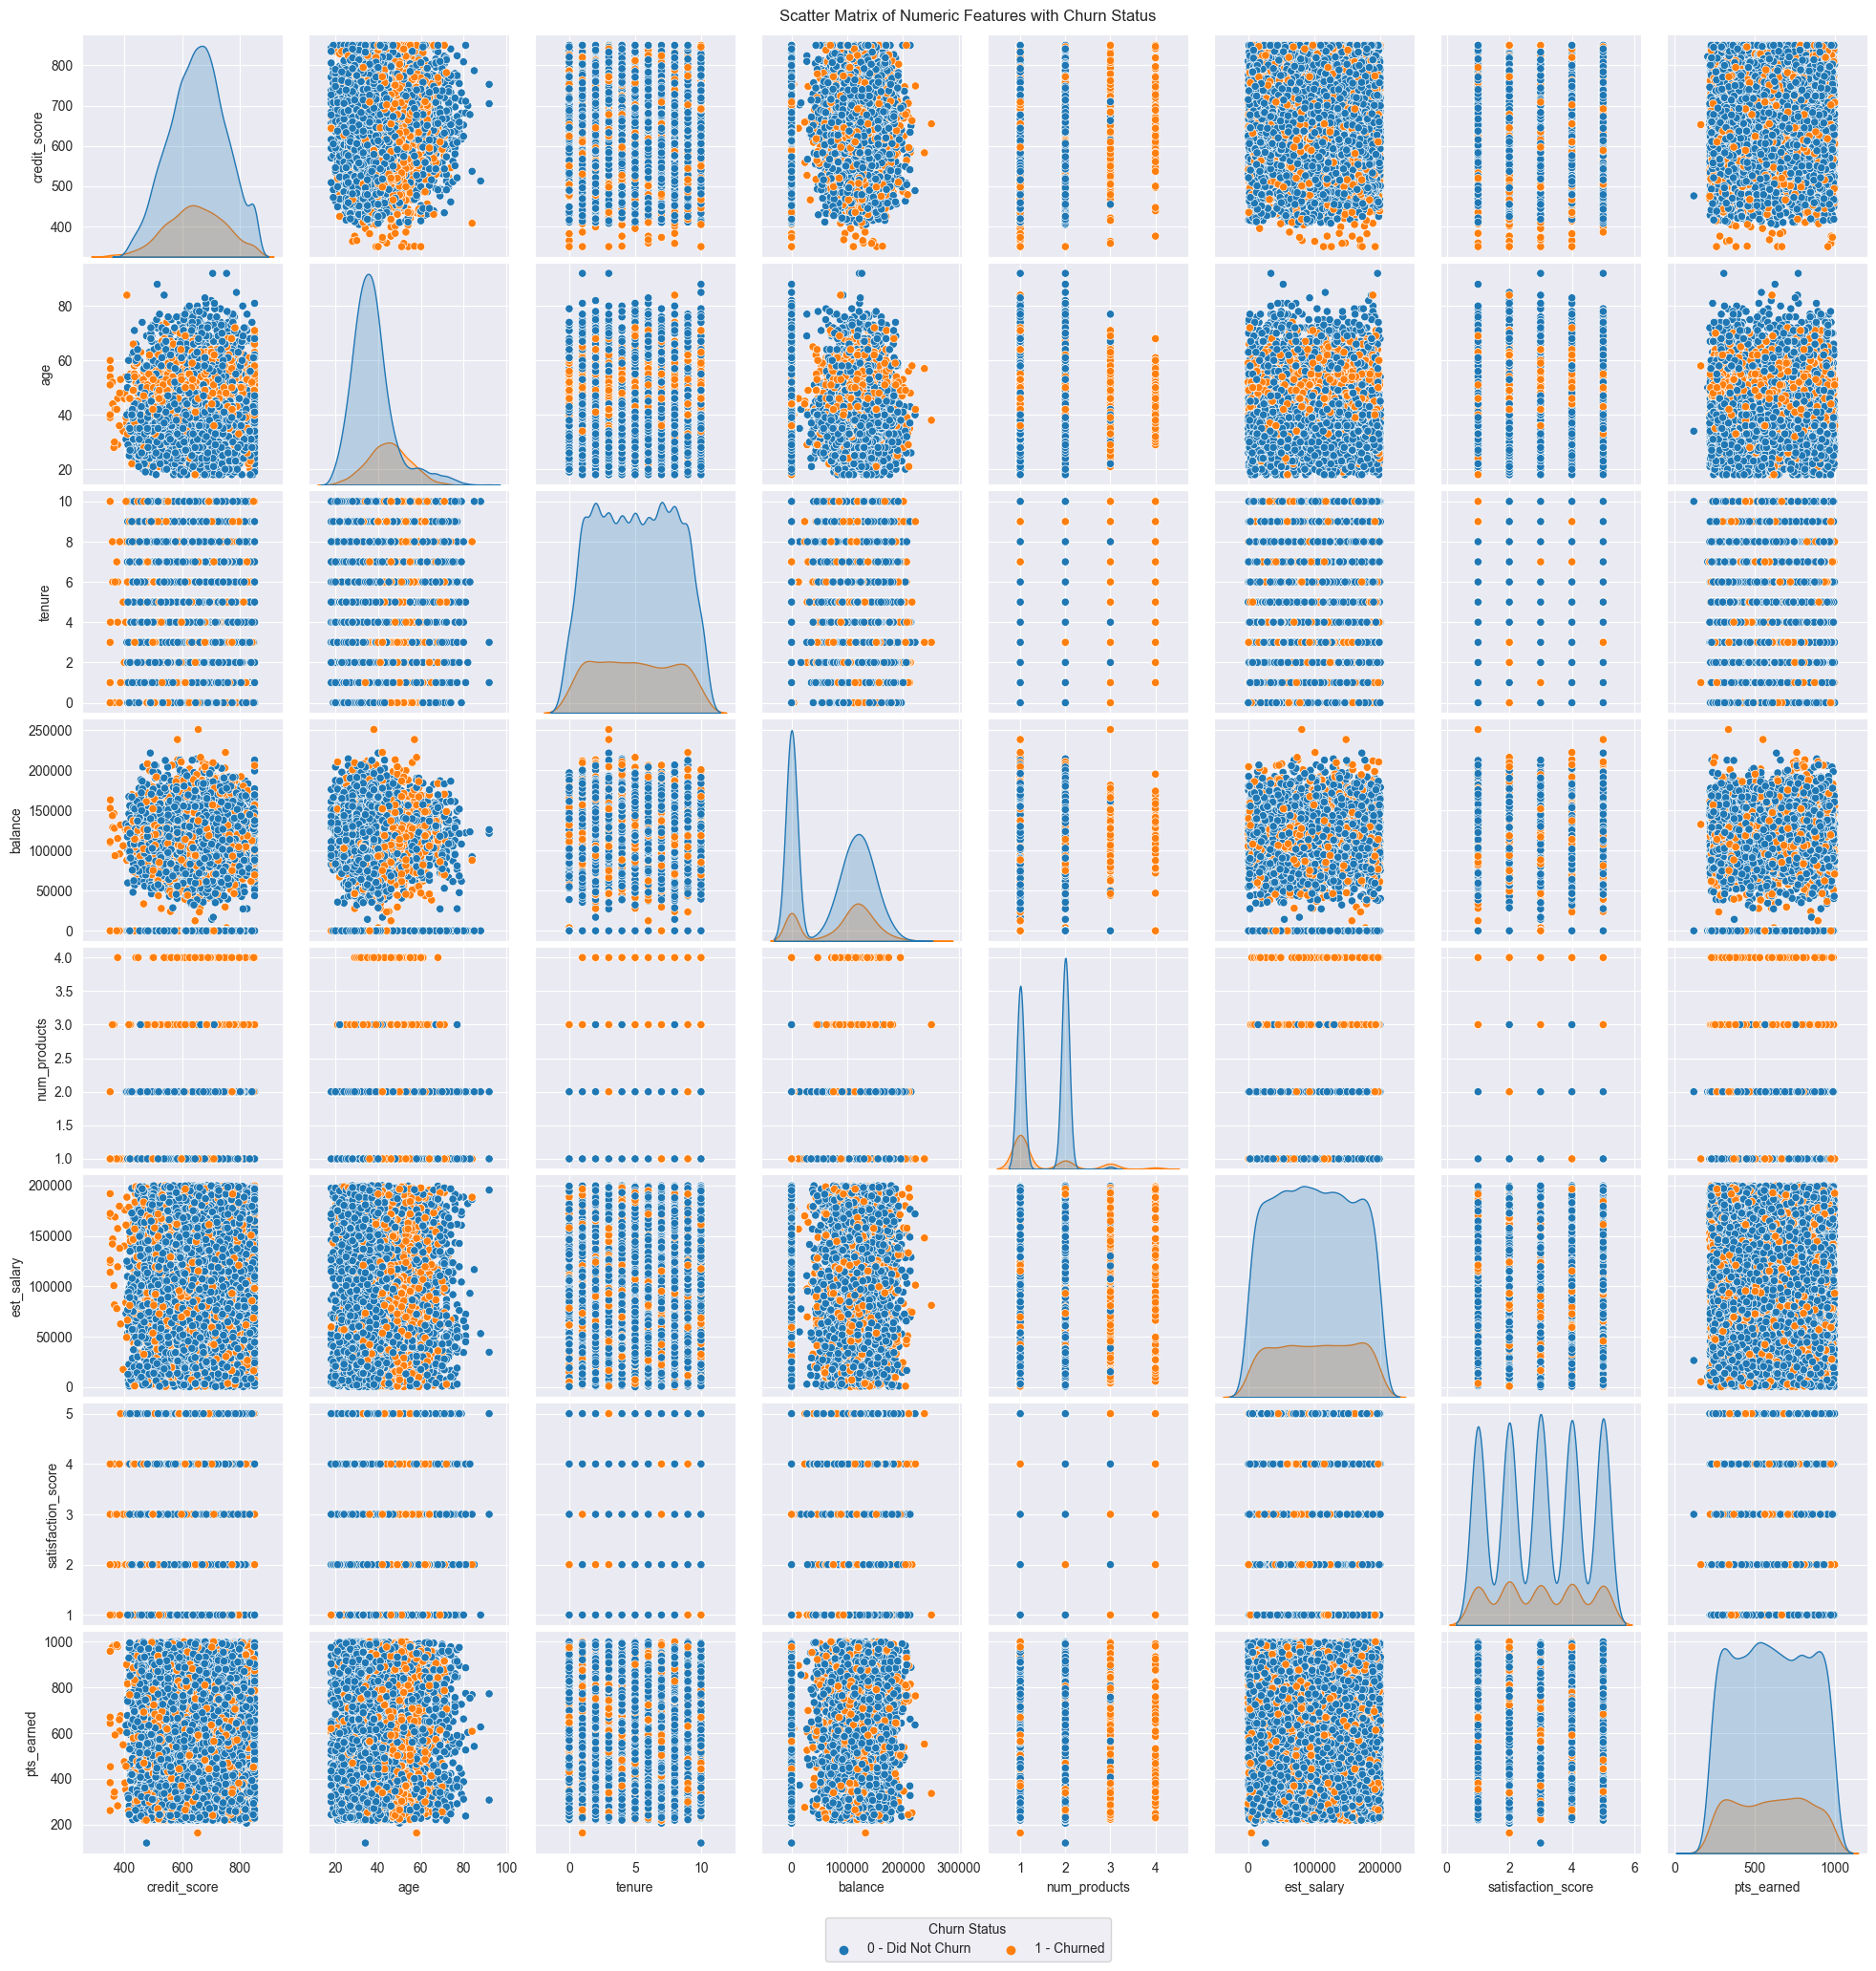

In [20]:
# Assuming 'num_df' is the DataFrame with numeric features and 'churned' is the hue variable
ax = sns.pairplot(num_df, hue = "churned")

# Remove the default legend
ax._legend.remove()

# Manually create a new legend at the bottom, stretching across one row
handles = ax._legend_data.values()
labels = ["0 - Did Not Churn", "1 - Churned"]

plt.figlegend(handles = handles, labels = labels, title = "Churn Status", loc = "lower center", 
              ncol = len(labels), bbox_to_anchor = (0.5, -0.025))

# Set the title for the entire plot (using the figure object)
plt.suptitle("Scatter Matrix of Numeric Features with Churn Status", y = 1.0)

# Display the plot
plt.show()

**Insights from Scatter Matrix**

1. **Credit Score**: The credit score appears to be a good predictor of customer churn status. Customers below a certain credit score threshold tend to churn, either voluntarily (due to an insufficient score to apply for loans) or involuntarily (removed for having a low credit score).
  
2. **Age**: Age also seems to predict churn status. There is a higher concentration of churned customers among middle-aged individuals (45-64 years). Younger customers (below 45) and elderly customers (65 and above) appear less likely to churn.

3. **Tenure**: Tenure shows predictive power as well, with very new customers (low tenure) and long-term customers (high tenure) being less likely to churn. The highest concentration of churned customers occurs in the mid-range tenure (around 5-7 years).

4. **Balance**: The balance can be a good predictor of churn status. Accounts with a zero balance are churned less frequently, likely because these customers are new and thus less likely to leave immediately. However, churn rates gradually increase as the balance approaches the median.

5. **Number of Products**: The `num_products` feature exhibits **perfect separation**, where customer churn can be determined solely when `num_products == 4`. This necessitates the use of regularization or other techniques to mitigate issues with estimating coefficients in predictive analytics. It also suggests that `num_products` could be treated as more of a categorical variable than a numeric one, since there are only 4 unique values in the column and the difference between churn rates of customers with 1 or 2 products is vastly different than those with 3 or 4 products.

6. **Estimated Salary**: Although not as strong a predictor as other factors, `est_salary` shows a slight trend; higher-salary customers seem somewhat more likely to churn.

7. **Satisfaction Score**: Surprisingly, `satisfaction_score` has no apparent impact on customer churn, as churn rates remain consistent across its range of 1-5.

8. **Points Earned**: The `pts_earned` feature appears to have little effect on customer churn, though it interestingly shows a peak in churn rates around 200 points before declining at 500 and increasing again at 750.

**Conclusion**

The EDA revealed several key factors influencing customer churn. `credit_score` and `age`/`age_group` are strong predictors, with lower credit scores correlating with higher churn rates, particularly among middle-aged customers (45-64 years). Additionally, the `balance` in accounts is indicative of churn, where zero balances are associated with lower churn rates, suggesting these customers are likely new.

The categorical bar chart analysis further highlights that churn rates vary significantly by `geography` and `gender`, with Germany showing the highest churn rate at 32.44% and females exhibiting a greater likelihood of churning compared to males. These insights underscore the importance of demographic trends in understanding customer behavior.

*Notes on the data for Machine Learning*
1. For anyone considering using this dataset for machine learning modeling, it's crucial to avoid placing `age` and `age_group` side by side as features, as it leads to multicollinearity as `age_group` was created by dividing `age` into several bins.
2. Additionally, if using `num_products` in your model, be mindful that it exhibits perfect separation and should be addressed using regularization or other suitable techniques to ensure robust model performance.

### New data set for predictive analytics

In [21]:
# Rearrange columns in specific order (categorical, then numeric, then target)
new_order = ["geography", "gender", "has_credit_card", "is_active", "card_type", "age_group", "age", "credit_score", "tenure", "balance", "num_products", "est_salary", "satisfaction_score", "pts_earned", "churned"]
df = df[new_order]
df.to_csv("final_churn_data.csv", index = False)
print("Output successful")

Output successful
